In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
 # Load the data
data = pd.read_csv(r"C:\Users\itspr\OneDrive\Desktop\Python Project\Python-Project\Mental_Health_Care_in_the_Last_4_Weeks (1).csv")
 
 # Show initial data info
print("Initial Data Info:")
print(data.info())
 
 # Drop duplicates
data = data.drop_duplicates()
 
 # Drop rows only if 'Value' is missing
data = data.dropna(subset=['Value'])
 
 # Check cleaned data info
print("\nCleaned Data Info:")
print(data.info())
 

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag   

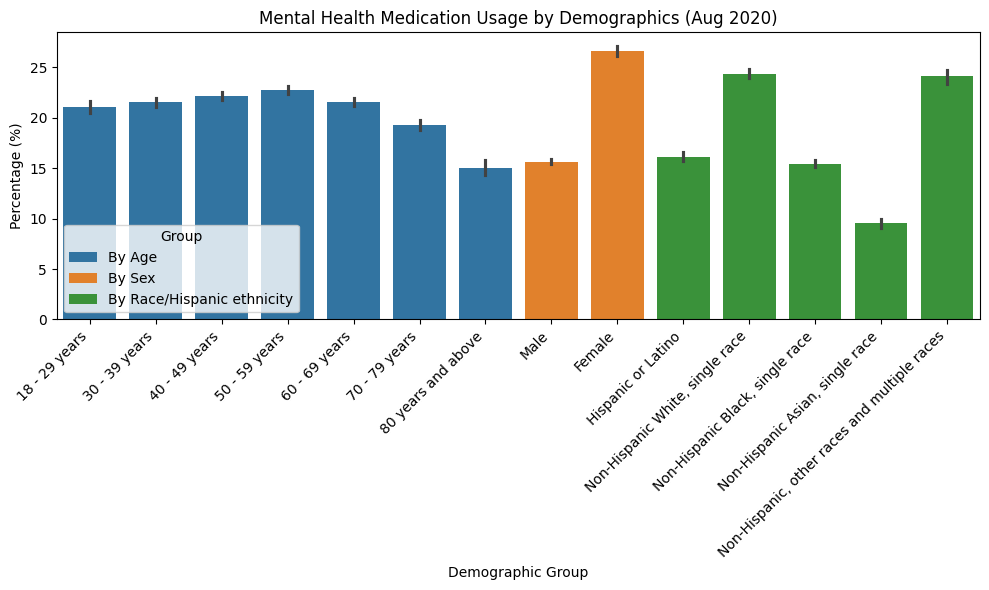

In [3]:
#section 2
 # Filter for medication data
med_data = data[data['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
 
 # Filter for demographic data
demo_data = med_data[med_data['Group'].isin(['By Age', 'By Sex', 'By Race/Hispanic ethnicity'])]
 
 # Create a simple bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Subgroup', y='Value', hue='Group', data=demo_data)
 
plt.title('Mental Health Medication Usage by Demographics (Aug 2020)')
plt.xlabel('Demographic Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
 

In [4]:
# Print the top 3 groups with highest medication usage
print("Groups with highest medication usage:")
print(demo_data.sort_values('Value', ascending=False)[['Group', 'Subgroup', 'Value']].head(3))
 #section 3 
 
 # Filter for medication data by state
state_data = data[(data['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks') & 
                  (data['Group'] == 'By State')]
 
 # Get top and bottom 5 states
top_states = state_data.nlargest(5, 'Value')
bottom_states = state_data.nsmallest(5, 'Value')
 
 # Create a simple bar chart
plt.figure(figsize=(10, 6))
 

Groups with highest medication usage:
        Group Subgroup  Value
9773   By Sex   Female   29.6
10093  By Sex   Female   28.8
8697   By Sex   Female   28.4


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

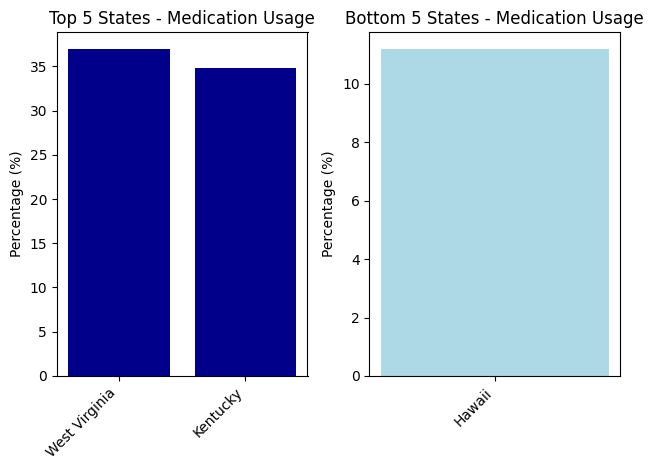

In [5]:
# Plot top 5 states
plt.subplot(1, 2, 1)
plt.bar(top_states['State'], top_states['Value'], color='darkblue')
plt.title('Top 5 States - Medication Usage')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
 
 # Plot bottom 5 states
plt.subplot(1, 2, 2)
plt.bar(bottom_states['State'], bottom_states['Value'], color='lightblue')
plt.title('Bottom 5 States - Medication Usage')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
 
plt.tight_layout()
plt.show()
 

National average: 22.5%
Highest state: West Virginia (37.0%)
Lowest state: Hawaii (10.0%)


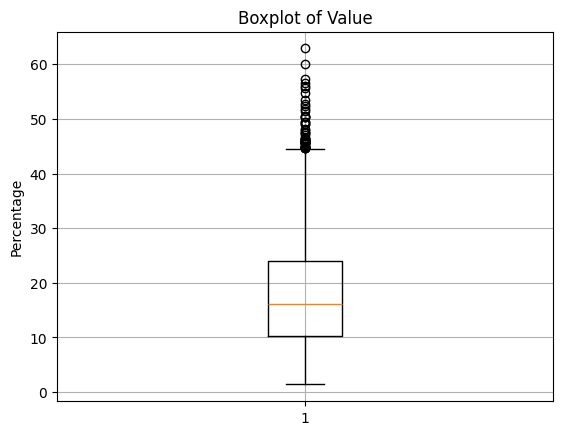


📊 Descriptive Analysis:

Grouped Mean Values by Indicator and Subgroup:
Indicator                                                      Subgroup          
Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks  18 - 29 years         19.848485
                                                               30 - 39 years         15.566667
                                                               40 - 49 years         11.845455
                                                               50 - 59 years          9.148485
                                                               60 - 69 years          5.775758
                                                                                       ...    
Took Prescription Medication for Mental Health, Last 4 Weeks   West Virginia         28.848485
                                                               Wisconsin             22.766667
                                                               With disability       

In [7]:
 # Print summary statistics
print(f"National average: {state_data['Value'].mean():.1f}%")
print(f"Highest state: {top_states.iloc[0]['State']} ({top_states.iloc[0]['Value']:.1f}%)")
print(f"Lowest state: {bottom_states.iloc[0]['State']} ({bottom_states.iloc[0]['Value']:.1f}%)")
 
 
 #section 4
 
 # Create boxplot for 'Value' column
plt.boxplot(data['Value'].dropna())
plt.title('Boxplot of Value')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()
 # Section 5 
print("\n📊 Descriptive Analysis:")
print("\nGrouped Mean Values by Indicator and Subgroup:")
summary = data.groupby(['Indicator', 'Subgroup'])['Value'].mean()
print(summary)